# Load data and python libraries

In [1]:
%matplotlib inline 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

#supporting math libraries
import math
import numpy as np

In [2]:
input_folder = './data/'
output_folder = './output'

input_file = 'athlete_events.csv'

In [3]:
df_data = pd.read_csv(input_folder + input_file)
print("Data base size: ", len(df_data))

Data base size:  271116


# Dataset First Look

**The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:**

- **ID** - Unique number for each athlete
- **Name** - Athlete's name
- **Sex** - M or F
- **Age** - Integer
- **Height** - In centimeters
- **Weight** - In kilograms
- **Team** - Team name
- **NOC** - National Olympic Committee 3-letter code
- **Games** - Year and season
- **Year** - Integer
- **Season** - Summer or Winter
- **City** - Host city
- **Sport** - Sport
- **Event** - Event
- **Medal** - Gold, Silver, Bronze, or NA

In [4]:
#a quick look at the data
k = int(len(df_data)/5)
print("Data shape: ", df_data.shape)
print("View of every ", k, "observation:")
df_data.iloc[::k].T

Data shape:  (271116, 15)
View of every  54223 observation:


,0,54223,108446,162669,216892,271115
ID,1,27817,54826,81686,108914,135571
Name,A Dijiang,Lopold Desmet,Rei Jimbo,"William ""Willi"" Moore",Veronica Servente Tealdy,Tomasz Ireneusz ya
Sex,M,M,F,M,F,M
Age,24,25,26,25,15,34
Height,180,164,164,182,NaN,185
Weight,80,70,55,67,NaN,96
Team,China,Belgium,Japan,Great Britain,Italy,Poland
NOC,CHN,BEL,JPN,GBR,ITA,POL
Games,1992 Summer,1960 Summer,2000 Summer,1972 Summer,1992 Summer,2002 Winter
Year,1992,1960,2000,1972,1992,2002


In [5]:
#add new features
df_data['outcome'] = df_data['Medal'].isnull().apply(lambda x: "won a medal" if x == False else "NO medal")

In [6]:
#assumption: NaN="No medal" in the column "Medal"
df_data['Medal'] = df_data['Medal'].fillna('No medal')

In [7]:
#ID check
df_data.groupby('ID')['Name'].nunique().describe()

count    135571.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Name, dtype: float64

In [8]:
#delete unnessesary features
print("Delete ID column since each ID corresponds to unique Name")
df_data = df_data.drop('ID', axis=1)

Delete ID column since each ID corresponds to unique Name


In [9]:
print('there are ', len(df_data) - len(df_data.drop_duplicates()),' duplicated observations in the dataset.')

print("Dele duplicates:")
print(len(df_data))
df_data = df_data.drop_duplicates()
print(len(df_data))

there are  1385  duplicated observations in the dataset.
Dele duplicates:
271116
269731


# Male vs. Female Athletes

In [10]:
df_data.groupby('Sex')[['Age', 'Height', 'Weight']].describe().T

Sex                      F              M
Age    count  73976.000000  186440.000000
       mean      23.697713      26.151947
       std        5.695049       6.203904
       min       11.000000      10.000000
       25%       20.000000      22.000000
       50%       23.000000      25.000000
       75%       27.000000      29.000000
       max       74.000000      97.000000
Height count  67378.000000  143539.000000
       mean     167.839740     178.859125
       std        8.778528       9.360033
       min      127.000000     127.000000
       25%      162.000000     172.000000
       50%      168.000000     179.000000
       75%      173.000000     185.000000
       max      213.000000     226.000000
Weight count  66771.000000  141433.000000
       mean      60.021252      75.744091
       std       10.212250      13.213003
       min       25.000000      28.000000
       25%       54.000000      67.000000
       50%       59.000000      74.000000
       75%       65.000000      83.000000
       max      167.000000     214.000000

/Users/tatiana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/tatiana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/tatiana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


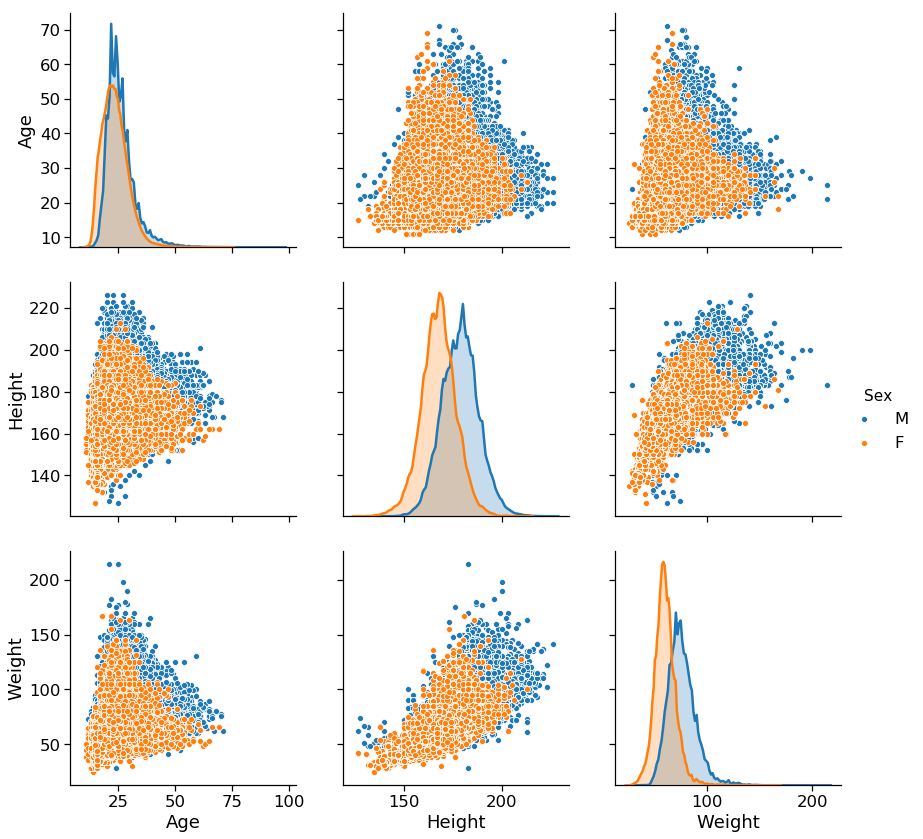

In [26]:
# Interaction between pairs of features.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(df_data[['Age', 'Height', 'Weight', 'Sex']], 
             hue="Sex", 
             diag_kind="kde",
             size=4);

##### Observations:

-
-

### Age distribution

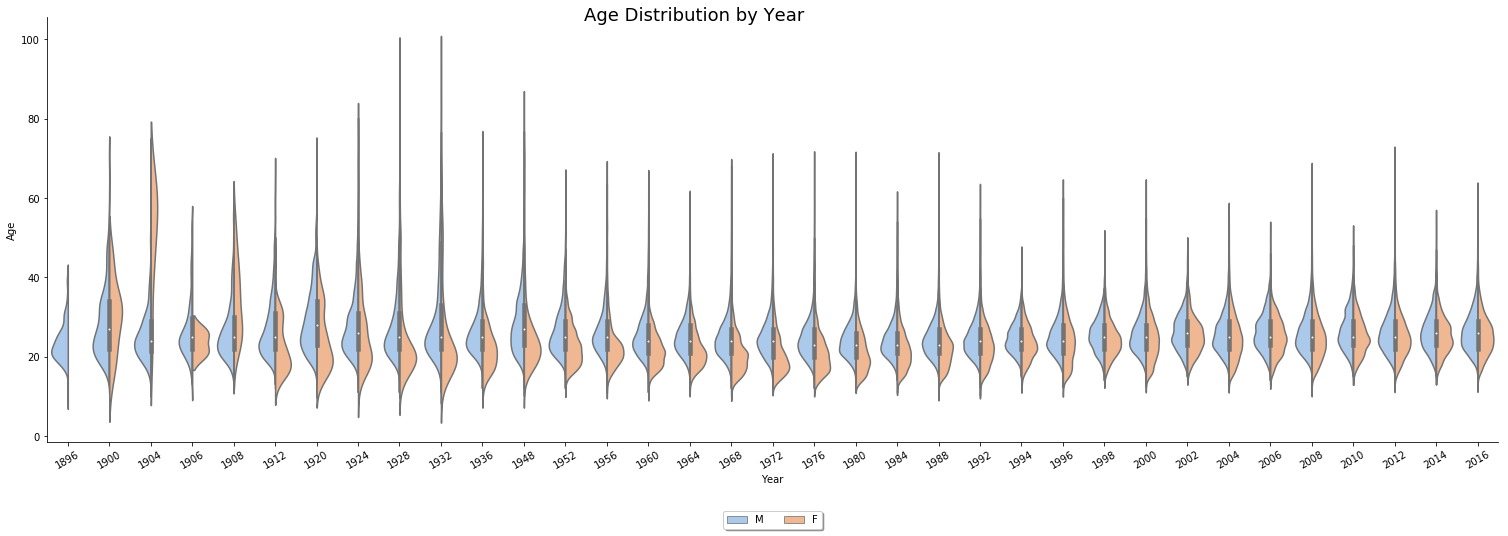

In [11]:
g = sns.catplot(x="Year", y="Age", hue="Sex", 
            palette='pastel', split=True, legend_out=False,
            kind="violin", data=df_data);

g.fig.set_figheight(7)
g.fig.set_figwidth(25)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Age Distribution by Year", fontsize=18)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

Text(0.5, 0.98, 'Median Age by Year')

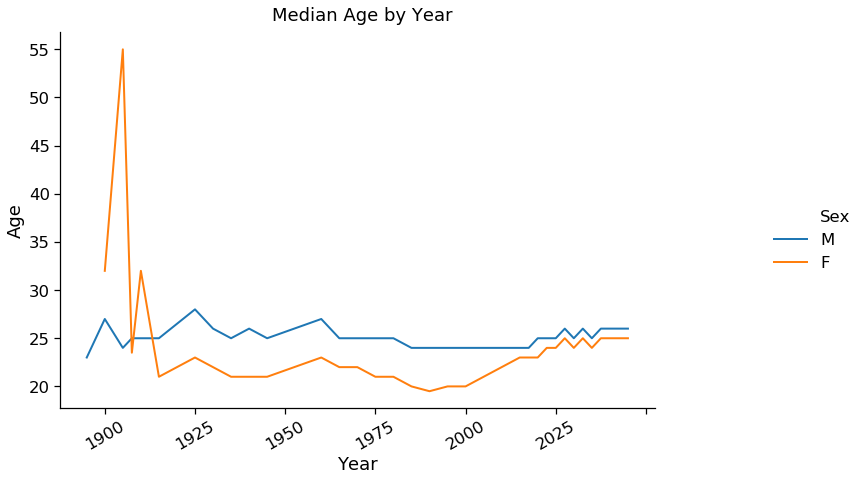

In [12]:
df_tmp = pd.DataFrame(df_data.groupby(['Year', 'Sex'])['Age'].median()).reset_index()

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
g = sns.relplot(x="Year", y="Age", kind="line",hue='Sex', data=df_tmp)
g.fig.set_figheight(7)
g.fig.set_figwidth(14)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Median Age by Year", fontsize=18)

In [13]:
print ("Sports with athletes older than 50")
age_ge50 = df_data[df_data['Age'] > 50]
ts = age_ge50['Sport'].value_counts()
ts

Sports with athletes older than 50


Art Competitions     560
Shooting             380
Equestrianism        247
Sailing              143
Archery               66
Fencing               40
Rowing                 9
Bobsleigh              5
Alpine Skiing          3
Curling                3
Speed Skating          2
Polo                   2
Roque                  2
Skeleton               2
Luge                   2
Croquet                2
Table Tennis           2
Figure Skating         1
Motorboating           1
Alpinism               1
Athletics              1
Diving                 1
Modern Pentathlon      1
Name: Sport, dtype: int64

In [14]:
top_5_age_ge50 = age_ge50[age_ge50['Sport'].isin(list(ts.index)[:5])]
top_5_age_ge50.groupby(['Sport', 'Sex'])['Age'].describe()

count       mean       std   min    25%   50%   75%  \
Sport            Sex                                                        
Archery          F     12.0  57.666667  3.797926  53.0  54.75  58.0  60.0   
                 M     54.0  57.370370  5.122265  51.0  54.00  56.0  61.0   
Art Competitions F     54.0  60.240741  6.870597  51.0  54.00  59.5  65.0   
                 M    506.0  59.608696  7.160469  51.0  54.00  58.0  64.0   
Equestrianism    F     60.0  55.416667  4.738203  51.0  52.00  53.5  58.0   
                 M    187.0  55.133690  4.363619  51.0  52.00  54.0  57.0   
Sailing          M    143.0  55.811189  4.732196  51.0  52.00  55.0  59.0   
Shooting         F     18.0  53.000000  1.814970  51.0  52.00  52.0  54.0   
                 M    362.0  55.038674  4.118554  51.0  52.00  54.0  57.0   

                       max  
Sport            Sex        
Archery          F    63.0  
                 M    71.0  
Art Competitions F    74.0  
                 M    97.0  
Equestrianism    F    69.0  
                 M    72.0  
Sailing          M    71.0  
Shooting         F    57.0  
                 M    72.0

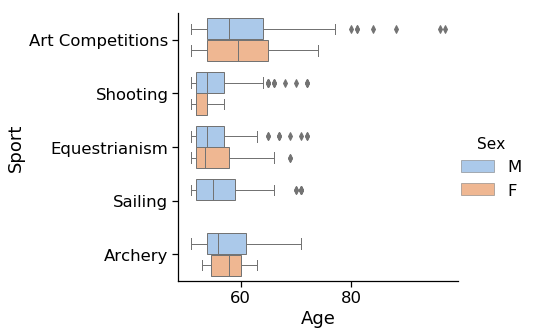

In [15]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

sns.catplot(x="Age", y="Sport", hue="Sex",
            kind="box",
            palette="pastel",  height=5, aspect=7/5,
            data=top_5_age_ge50)

##### Observations:

-
-

### Age of Athletes with Medals

In [16]:
df_medals = df_data[df_data['Medal'].isnull() == False]

df_medals.groupby(['Medal', 'Sex'])['Age'].describe()

count       mean       std   min   25%   50%   75%   max
Medal    Sex                                                             
Bronze   F      3763.0  24.708743  5.334748  12.0  21.0  24.0  28.0  69.0
         M      9243.0  26.355729  5.957346  10.0  22.0  25.0  29.0  72.0
Gold     F      3744.0  24.372596  5.221598  13.0  21.0  24.0  27.0  63.0
         M      9478.0  26.503376  6.032284  13.0  22.0  25.0  29.0  64.0
No medal F     62740.0  23.552391  5.755343  11.0  19.0  23.0  27.0  74.0
         M    158632.0  26.091911  6.227382  11.0  22.0  25.0  29.0  97.0
Silver   F      3729.0  24.444891  5.257146  11.0  21.0  24.0  27.0  55.0
         M      9087.0  26.626169  6.179563  13.0  23.0  26.0  29.0  73.0

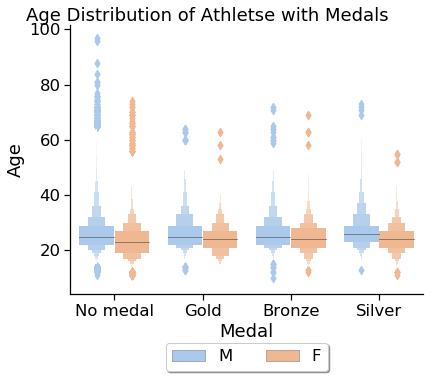

In [17]:
g = sns.catplot(x="Medal", y="Age", hue="Sex", 
            palette='pastel', legend_out=False, k_depth="proportion",
            kind="boxen", data=df_medals);

g.fig.set_figheight(5)
g.fig.set_figwidth(7)

g.fig.suptitle("Age Distribution of Athletse with Medals", fontsize=18)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

In [18]:
#probability to have a medal at sertain age
df_tmp = pd.DataFrame(df_data.groupby(['Sex', 'Age', 'Medal'])['Name'].count()).reset_index()

In [19]:
df_test = df_tmp.groupby(['Sex', 'Age'])['Medal'].count()
df_test[df_test < 4]

Sex  Age 
F    11.0    2
     12.0    3
     45.0    3
     48.0    2
     49.0    2
     50.0    2
     51.0    3
     52.0    3
     53.0    2
     54.0    1
     55.0    2
     56.0    1
     57.0    1
     58.0    3
     59.0    1
     60.0    1
     61.0    1
     62.0    1
     63.0    3
     65.0    1
     66.0    1
     67.0    1
     68.0    1
     69.0    2
     70.0    1
     72.0    1
     73.0    1
     74.0    1
M    10.0    1
     11.0    1
     12.0    2
     13.0    3
     61.0    3
     62.0    1
     64.0    3
     65.0    2
     66.0    2
     67.0    1
     68.0    2
     69.0    2
     70.0    1
     71.0    3
     72.0    3
     73.0    2
     74.0    1
     75.0    1
     76.0    1
     77.0    1
     80.0    1
     81.0    1
     84.0    1
     88.0    1
     96.0    1
     97.0    1
Name: Medal, dtype: int64

In [20]:
#considering only ages with 3 medals for any gender

df_tmp = df_tmp[(df_tmp['Age'] > 13) & (df_tmp['Age'] < 45)]
df_tmp.head()                

,Sex,Age,Medal,Name
9,F,14.0,Bronze,15
10,F,14.0,Gold,20
11,F,14.0,No medal,684
12,F,14.0,Silver,25
13,F,15.0,Bronze,51


In [21]:
df_tmp['total'] = df_tmp.groupby(['Sex', 'Age'])['Name'].transform('sum')
df_tmp.head()

,Sex,Age,Medal,Name,total
9,F,14.0,Bronze,15,744
10,F,14.0,Gold,20,744
11,F,14.0,No medal,684,744
12,F,14.0,Silver,25,744
13,F,15.0,Bronze,51,1911


In [22]:
df_tmp['chance to have'] = df_tmp['Name'] / df_tmp['total'] * 100
df_tmp = df_tmp[df_tmp['Medal'] != 'No medal']
df_tmp['Age'] = df_tmp['Age'].apply(int)
df_tmp.head()

,Sex,Age,Medal,Name,total,chance to have
9,F,14,Bronze,15,744,2.016129
10,F,14,Gold,20,744,2.688172
12,F,14,Silver,25,744,3.360215
13,F,15,Bronze,51,1911,2.668760
14,F,15,Gold,66,1911,3.453689


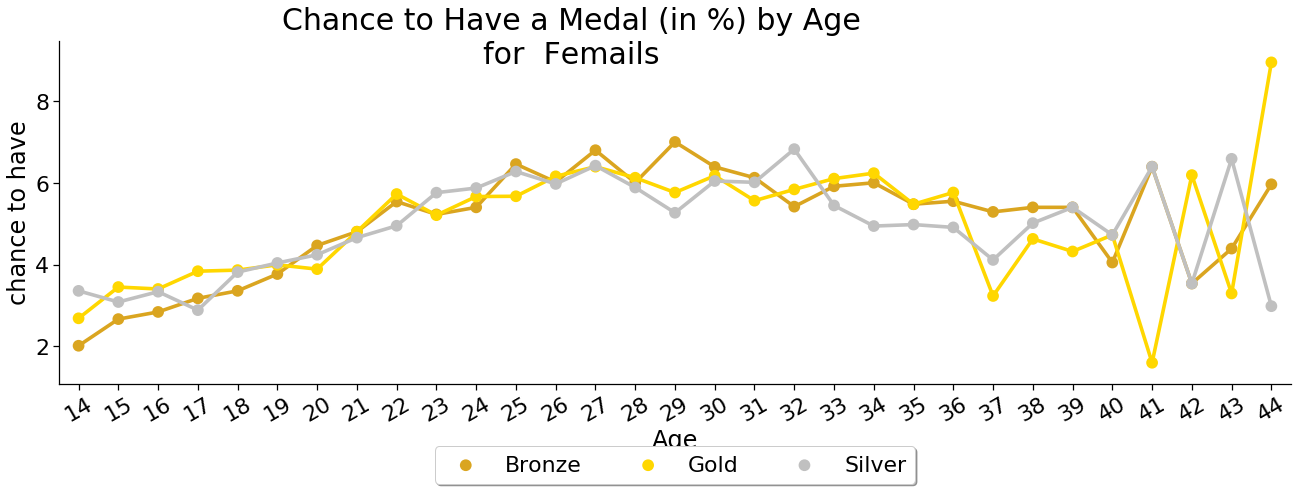

In [23]:
df_tmp_F = df_tmp[df_tmp['Sex'] == 'F']

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})

g = sns.catplot(x="Age", y="chance to have", hue="Medal",
            palette={"Gold": "gold", "Silver": "silver", "Bronze": "goldenrod"},
            legend=False,
            #linestyles=["-", "--"], markers=["^", "o"],
            kind="point", data=df_tmp_F)

g.fig.set_figheight(7)
g.fig.set_figwidth(25)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Chance to Have a Medal (in %) by Age\nfor  Femails", fontsize=30)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

In [24]:
df_tmp = df_data[df_data['Medal'] != 'No medal']
df_tmp = df_tmp[(df_tmp['Age'] > 13) & (df_tmp['Age'] < 45)]
df = df_tmp[(df_tmp['Sex'] == 'F') & (df_tmp['Age'] > 41)].sort_values(by=['Age',
                                                                         'Medal', 
                                                                        'Sport',])[['Age','Medal',  'Sport']]
df = df.set_index('Age')
df

,Medal,Sport
Age,,
42.0,Bronze,Equestrianism
42.0,Bronze,Equestrianism
42.0,Bronze,Equestrianism
42.0,Bronze,Handball
42.0,Gold,Archery
42.0,Gold,Canoeing
42.0,Gold,Cycling
42.0,Gold,Equestrianism
42.0,Gold,Equestrianism


In [25]:
df_tmp_M = df_tmp[df_tmp['Sex'] == 'M']

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})

g = sns.catplot(x="Age", y="chance to have", hue="Medal",
            palette={"Gold": "gold", "Silver": "silver", "Bronze": "goldenrod"},
            legend=False,
            #linestyles=["-", "--"], markers=["^", "o"],
            kind="point", data=df_tmp_M)

g.fig.set_figheight(7)
g.fig.set_figwidth(25)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Chance to Have a Medal (in %) by Age\nfor  Males", fontsize=30)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

ValueError: Could not interpret input 'chance to have'

##### Observations:

- Both women and men are at the picks of their performance in their middle 20s.
- Although chances to win a medal start to decline at the end of thirties from around 6% nearing 4%, women can perform as strong as their middle 20s in their after 40s in such sports as Equestrianism, Curling and Archery.
- Men's chances to win a medal has very little change from its pick in the 20s second halh. 

### Number of athletes by year

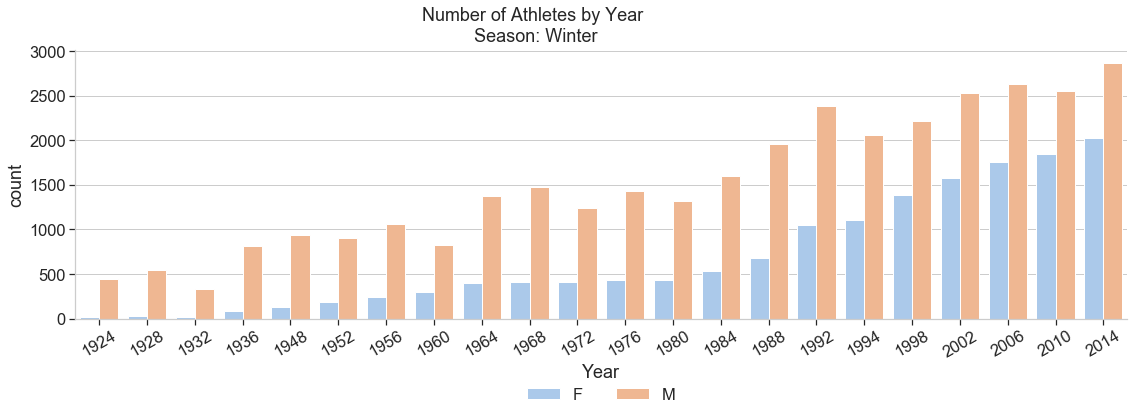

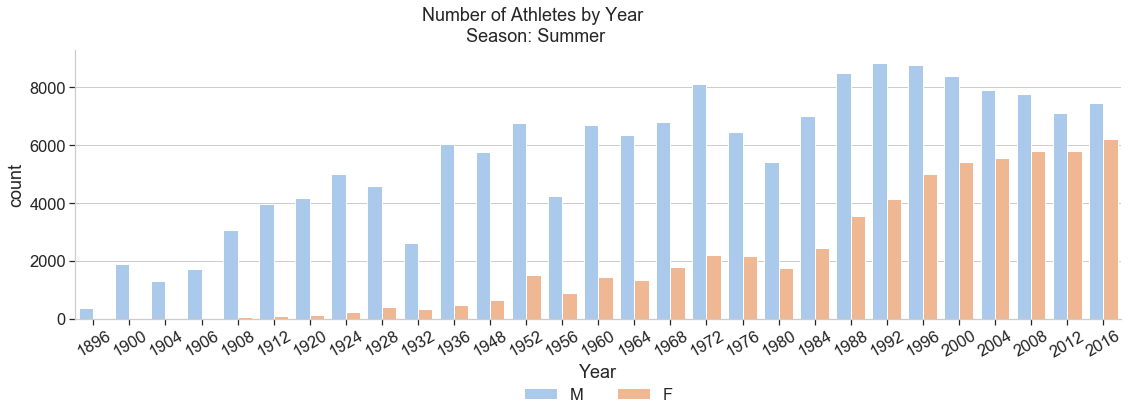

In [38]:
plt.style.use('seaborn-whitegrid')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

season = 'Winter'
df_tmp = df_data[df_data['Season'] == season]
g = sns.catplot(x="Year", hue="Sex", 
            palette='pastel', legend_out=False,
            kind="count", data=df_tmp);

g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Number of Athletes by Year\n Season: " + season, fontsize=18, y=1.05)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)



season = 'Summer'
df_tmp = df_data[df_data['Season'] == season]
g = sns.catplot(x="Year", hue="Sex",
            palette='pastel', legend_out=False,
            kind="count", data=df_tmp);

g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Number of Athletes by Year\n Season: " + season, fontsize=18, y=1.05)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

##### Observations:

-
-

# Women sport types

In [200]:
df_F = df_data[df_data['Sex'] == 'F'].copy()
df_F['Number of athletes'] = df_tmp['Name']
df_F['Number of sports'] = df_tmp['Sport']

In [183]:
year = 1928

df_F_sports = pd.DataFrame(df_F.groupby(['Year', 'Sport'])['Number of athletes'].count()).reset_index()
df_F_sports = df_F_sports.set_index('Year')
df_F_sports.loc[year]

,Sport,Number of athletes
Year,,
1928,Art Competitions,55
1928,Athletics,129
1928,Diving,27
1928,Fencing,27
1928,Figure Skating,33
1928,Gymnastics,56
1928,Sailing,2
1928,Swimming,108


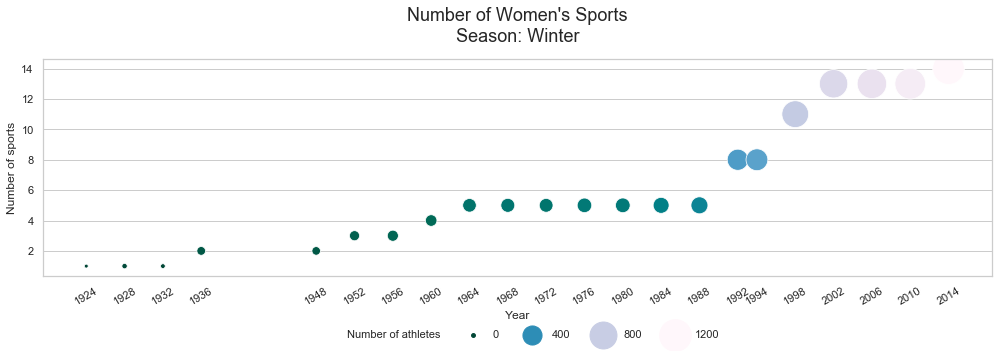

In [209]:
df_F_sports = pd.DataFrame(df_F.groupby('Year')[['Number of sports', 'Number of athletes']].nunique())
df_F_sports = df_F_sports.reset_index()

plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1)

season = 'Winter'
df_tmp = df_F[df_F['Season'] == season]
df_F_sports = pd.DataFrame(df_tmp.groupby('Year')[['Number of sports', 'Number of athletes']].nunique())
df_F_sports = df_F_sports.reset_index()

plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1)

g = sns.scatterplot(x="Year", y="Number of sports", 
               size="Number of athletes", hue="Number of athletes", sizes=(15, 1000), 
               palette='mako',
               data=df_F_sports)

plt.title("Number of Women's Sports\nSeason: " + season, fontsize=18, y=1.05)
g.figure.set_figwidth(17)
g.set_xticks(list(df_F_sports['Year'].values))
g.set_xticklabels(list(df_F_sports['Year'].values), rotation=30)
g.grid(axis='x')
g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


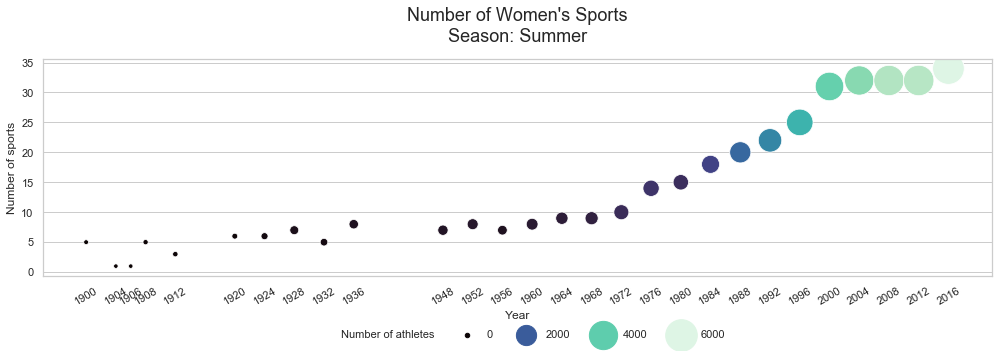

In [241]:
plt.style.use('seaborn-whitegrid')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

season = 'Summer'
df_tmp = df_F[df_F['Season'] == season]
df_F_sports = pd.DataFrame(df_tmp.groupby('Year')[['Number of sports', 'Number of athletes']].nunique())
df_F_sports = df_F_sports.reset_index()

plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1)

g = sns.scatterplot(x="Year", y="Number of sports", 
               size="Number of athletes", hue="Number of athletes", sizes=(20, 1000), 
               palette='mako', 
               data=df_F_sports)

plt.title("Number of Women's Sports\nSeason: " + season, fontsize=18, y=1.05)
g.figure.set_figwidth(17)
g.set_xticks(list(df_F_sports['Year'].values))
g.set_xticklabels(list(df_F_sports['Year'].values), rotation=30)
g.grid(axis='x')
g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

##### Observations:

-
-